In [6]:
#The point of this project is to create the most effective plague

In [7]:
#We added factors such as government intervention to make the model as realistic as possible

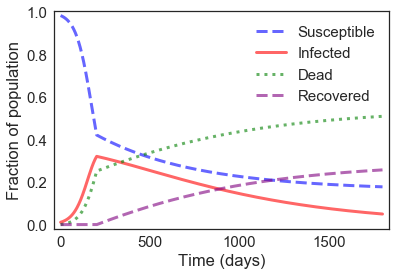

In [10]:

%matplotlib inline

from modsim import *

init = State(S=89, I=1, R=0, INC=.5, RE=0)
#convert values to percentages
init /= sum(init)
beta = 1/30
gamma = 1/100
recov=0
def make_system(beta, gamma, recov):
    '''
    beta is contact rate
    gamma is death rate
    '''
    init = State(S=89, I=1, R=0, INC=.5, RE=0)
    init /= sum(init)

    t0 = 0
    #
    t_end = 5*360

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, recov=recov)


system = make_system(beta, gamma, recov)

def update(state, system):

    s, i, r, inc, re = state
    infected_unknown = system.beta * i * s
    infected = infected_unknown*inc   
    dead = system.gamma * i
    recovered = system.recov * i
    
    s += -infected - infected_unknown
    i += infected + infected_unknown - dead - recovered
    r += dead
    re+= recovered
    
    #if more than x% of the population is dead, the government will intervene
    if(r>.25):
        system.beta=1/300
        system.gamma=1/1000
        system.recov=1/1000
    
    return State(S=s, I=i, R=r, INC = inc, RE = re)


state = update(init, system)

def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add three Series objects to the System: S, I, R
    
    system: System object
    update_func: function that updates state
    """
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    INC = TimeSeries()
    RE=TimeSeries()
    
    state = system.init
    t0 = system.t0
    S[t0], I[t0], R[t0], INC[t0], RE[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], R[t+1], INC[t+1], RE[t+1] = state
    
    system.S = S
    system.I = I
    system.R = R
    system.INC=INC
    system.RE=RE
    
#plots the amount of susceptible, infected, dead, and recovered   
def plot_results(S, I, R, RE):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Dead')
    plot(RE, 'r--', color='purple', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')
    
newfig()

run_simulation(system, update)
plot_results(system.S, system.I, system.R, system.RE)